In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 

/home/bing/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:54: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


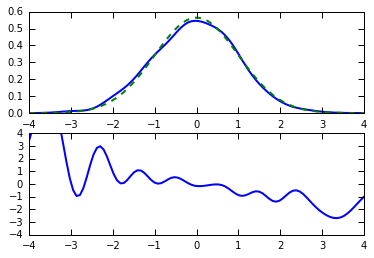

In [43]:
N = 1000  # number of sampling points  
# h = 0.337 # bandwidth  
NP = 100 # number of grid points for plotting
q = np.random.randn(N)

x = np.linspace(-4,4,NP)
p = np.zeros(NP)
logp = np.zeros(NP)
#kde = stats.gaussian_kde(q, bw_method='silverman')


d = 1 
# h = N**(-1./(d+4)) # scotts 
h = (N * (d + 2) / 4.)**(-1. / (d + 4)) # silverman 

class gaussian_kde:
    
    """
    kernal density estimation using gaussian kernal 
    """
    
    def __init__(self,x,h):
        self.x = x    # sampling points 
        self.bw = h   # bandwidth 
    
    def pdf(self,z):
        
        x = self.x 
        h = self.bw
        N = len(x)

        pdf = sum(np.exp(-(z-x)**2/2./h**2) / np.sqrt(np.pi) / (N * h))
        
        return pdf
    
    def logpdf(self,z):
        
        z = self.pdf(z)
        
        return np.log(z)
    
    def dpdf(self,z,M = 20):
        """
        direct esitmate of the derivative of the log of probability density function 
        M : number of datapoints used to fit 
        """
        h = 0.5
        N = len(self.x)
            
        # randomly choose M datapoints 
        x = np.zeros(M) 
        for i in range(M):
            j = np.random.rand() * N 
            x[i] = self.x[j] 
            
        x = np.linspace(-3,3,M)

        G = np.zeros((M,M))
        for i in range(M):
            for j in range(M):
                xc = (x[j] + x[i])/2.0
                dx = x[i] - x[j]
                G[i,j] = sum(np.exp(- dx**2/4.0/h**2) * np.exp(-(self.x - xc)**2/h**2)/ np.pi/ h**2 / N)
        
        g = 0.0
        for i in range(M):
            G[i,i] = G[i,i] + g 
        
        b = np.zeros(M)
        for i in range(M):
            b[i] = sum(-(x[i]-self.x)/h**2 * np.exp(-(x[i]-self.x)**2/2./h**2) / np.sqrt(np.pi) / h) / N
        
        c = np.linalg.solve(G,-b/2.0)
        

        dpdf = np.dot(c , np.exp(-(z-x)**2/2./h**2) / np.sqrt(np.pi) / h)
        
        return dpdf        
            
kde = gaussian_kde(q,h)

for j in range(NP):
    p[j] = kde.pdf(x[j])
    logp[j] = kde.dpdf(x[j])

plt.subplot(211) 
plt.plot(x,p)
plt.plot(x,np.exp(-x**2/2.)/np.sqrt(np.pi),'--',label='normal')

plt.subplot(212)
plt.plot(x,-logp)
#plt.plot(x,-x)
plt.ylim(-4,4)
plt.legend()
plt.show()

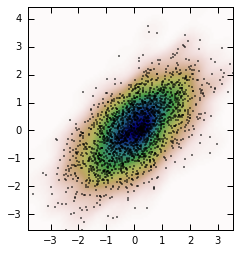

In [59]:
# Generate some random two-dimensional data:

from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

# Perform a kernel density estimate on the data:

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

# Plot the results:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=2)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [74]:
help(stats.gaussian_kde)

Help on class gaussian_kde in module scipy.stats.kde:

class gaussian_kde(__builtin__.object)
 |  Representation of a kernel-density estimate using Gaussian kernels.
 |  
 |  Kernel density estimation is a way to estimate the probability density
 |  function (PDF) of a random variable in a non-parametric way.
 |  `gaussian_kde` works for both uni-variate and multi-variate data.   It
 |  includes automatic bandwidth determination.  The estimation works best for
 |  a unimodal distribution; bimodal or multi-modal distributions tend to be
 |  oversmoothed.
 |  
 |  Parameters
 |  ----------
 |  dataset : array_like
 |      Datapoints to estimate from. In case of univariate data this is a 1-D
 |      array, otherwise a 2-D array with shape (# of dims, # of data).
 |  bw_method : str, scalar or callable, optional
 |      The method used to calculate the estimator bandwidth.  This can be
 |      'scott', 'silverman', a scalar constant or a callable.  If a scalar,
 |      this will be used di